In [69]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read dataset
df = pd.read_csv('yellow_tripdata_2020-01.csv')
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1.0,6.00,3.00,0.5,1.47,0.00,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1.0,7.00,3.00,0.5,1.50,0.00,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1.0,6.00,3.00,0.5,1.00,0.00,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1.0,5.50,0.50,0.5,1.36,0.00,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2.0,3.50,0.50,0.5,0.00,0.00,0.3,4.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6405003,NaN,2020-01-31 22:51:00,2020-01-31 23:22:00,NaN,3.24,NaN,NaN,237,234,NaN,17.59,2.75,0.5,0.00,0.00,0.3,21.14,0.0
6405004,NaN,2020-01-31 22:10:00,2020-01-31 23:26:00,NaN,22.13,NaN,NaN,259,45,NaN,46.67,2.75,0.5,0.00,12.24,0.3,62.46,0.0
6405005,NaN,2020-01-31 22:50:07,2020-01-31 23:17:57,NaN,10.51,NaN,NaN,137,169,NaN,48.85,2.75,0.0,0.00,0.00,0.3,51.90,0.0
6405006,NaN,2020-01-31 22:25:53,2020-01-31 22:48:32,NaN,5.49,NaN,NaN,50,42,NaN,27.17,2.75,0.0,0.00,0.00,0.3,30.22,0.0


In [3]:
#check shape
df.shape

(6405008, 18)

In [4]:
#chacek data type
df.dtypes

VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

In [5]:
#change datype
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [6]:
#chacek data type
df.dtypes

VendorID                        float64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                    float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
dtype: object

In [7]:
#checking the time 
df["Duration"] = df['tpep_dropoff_datetime'] -  df['tpep_pickup_datetime']

#covert time into mints
df["Duration"] = df["Duration"].dt.total_seconds()/60
#showing dataset
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Duration
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1.0,6.00,3.00,0.5,1.47,0.00,0.3,11.27,2.5,4.800000
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1.0,7.00,3.00,0.5,1.50,0.00,0.3,12.30,2.5,7.416667
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1.0,6.00,3.00,0.5,1.00,0.00,0.3,10.80,2.5,6.183333
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1.0,5.50,0.50,0.5,1.36,0.00,0.3,8.16,0.0,4.850000
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2.0,3.50,0.50,0.5,0.00,0.00,0.3,4.80,0.0,2.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6405003,NaN,2020-01-31 22:51:00,2020-01-31 23:22:00,NaN,3.24,NaN,NaN,237,234,NaN,17.59,2.75,0.5,0.00,0.00,0.3,21.14,0.0,31.000000
6405004,NaN,2020-01-31 22:10:00,2020-01-31 23:26:00,NaN,22.13,NaN,NaN,259,45,NaN,46.67,2.75,0.5,0.00,12.24,0.3,62.46,0.0,76.000000
6405005,NaN,2020-01-31 22:50:07,2020-01-31 23:17:57,NaN,10.51,NaN,NaN,137,169,NaN,48.85,2.75,0.0,0.00,0.00,0.3,51.90,0.0,27.833333
6405006,NaN,2020-01-31 22:25:53,2020-01-31 22:48:32,NaN,5.49,NaN,NaN,50,42,NaN,27.17,2.75,0.0,0.00,0.00,0.3,30.22,0.0,22.650000


In [8]:
#folter dataset which we need
df = df[['passenger_count','payment_type','fare_amount','trip_distance','Duration']]
df

,passenger_count,payment_type,fare_amount,trip_distance,Duration
0,1.0,1.0,6.00,1.20,4.800000
1,1.0,1.0,7.00,1.20,7.416667
2,1.0,1.0,6.00,0.60,6.183333
3,1.0,1.0,5.50,0.80,4.850000
4,1.0,2.0,3.50,0.00,2.300000
...,...,...,...,...,...
6405003,NaN,NaN,17.59,3.24,31.000000
6405004,NaN,NaN,46.67,22.13,76.000000
6405005,NaN,NaN,48.85,10.51,27.833333
6405006,NaN,NaN,27.17,5.49,22.650000


In [9]:
#check null value
df.isnull().sum()

passenger_count    65441
payment_type       65441
fare_amount            0
trip_distance          0
Duration               0
dtype: int64

In [10]:
#drop null data
df.dropna(inplace = True)
df

,passenger_count,payment_type,fare_amount,trip_distance,Duration
0,1.0,1.0,6.0,1.20,4.800000
1,1.0,1.0,7.0,1.20,7.416667
2,1.0,1.0,6.0,0.60,6.183333
3,1.0,1.0,5.5,0.80,4.850000
4,1.0,2.0,3.5,0.00,2.300000
...,...,...,...,...,...
6339562,1.0,1.0,11.0,2.10,14.233333
6339563,1.0,1.0,13.0,2.13,19.000000
6339564,1.0,1.0,12.5,2.55,16.283333
6339565,1.0,2.0,8.5,1.61,9.633333


In [11]:
#check null value
df.isnull().sum()

passenger_count    0
payment_type       0
fare_amount        0
trip_distance      0
Duration           0
dtype: int64

In [12]:
#covert datatype
df['passenger_count'] = df['passenger_count'].astype('int64')
df['payment_type'] = df['payment_type'].astype('int64')

In [13]:
#chacek data type
df.dtypes

passenger_count      int64
payment_type         int64
fare_amount        float64
trip_distance      float64
Duration           float64
dtype: object

In [14]:
#check duplicate
df[df.duplicated()]

,passenger_count,payment_type,fare_amount,trip_distance,Duration
2056,1,2,7.0,0.00,0.000000
2441,1,1,52.0,0.00,0.200000
2446,2,1,9.5,1.70,13.066667
2465,1,1,4.0,0.40,3.083333
3344,1,1,6.0,1.20,5.350000
...,...,...,...,...,...
6339558,1,2,8.0,1.63,8.800000
6339559,1,1,8.5,1.81,8.016667
6339560,1,2,6.5,0.98,6.900000
6339562,1,1,11.0,2.10,14.233333


In [15]:
#drop duplicate values
df.drop_duplicates(inplace = True)
df

,passenger_count,payment_type,fare_amount,trip_distance,Duration
0,1,1,6.0,1.20,4.800000
1,1,1,7.0,1.20,7.416667
2,1,1,6.0,0.60,6.183333
3,1,1,5.5,0.80,4.850000
4,1,2,3.5,0.00,2.300000
...,...,...,...,...,...
6339555,3,1,10.0,2.09,14.800000
6339561,1,1,17.5,4.11,21.500000
6339563,1,1,13.0,2.13,19.000000
6339564,1,1,12.5,2.55,16.283333


In [16]:
#check shape
df.shape

(3007861, 5)

In [17]:
# Get the percentage distribution of each unique value in the 'passenger_count' column
df['passenger_count'].value_counts(normalize = True)

passenger_count
1    0.581981
2    0.190350
3    0.066360
5    0.062937
6    0.039272
4    0.036046
0    0.023033
7    0.000009
9    0.000006
8    0.000006
Name: proportion, dtype: float64

In [18]:
# Get the percentage distribution of each unique value in the 'payment_type' column
df['payment_type'].value_counts(normalize = True)

payment_type
1    6.782670e-01
2    3.075731e-01
3    8.721480e-03
4    5.438084e-03
5    3.324622e-07
Name: proportion, dtype: float64

In [19]:
# Filter the DataFrame to include only rows where 'payment_type' is less than 3
df = df[df['payment_type'] < 3]

# Further filter the DataFrame to include only rows where 'passenger_count' is between 1 and 5 (inclusive)
df = df[(df['passenger_count'] > 0) & (df['passenger_count'] < 6)]


In [20]:
df.shape

(2780283, 5)

In [21]:
df

,passenger_count,payment_type,fare_amount,trip_distance,Duration
0,1,1,6.0,1.20,4.800000
1,1,1,7.0,1.20,7.416667
2,1,1,6.0,0.60,6.183333
3,1,1,5.5,0.80,4.850000
4,1,2,3.5,0.00,2.300000
...,...,...,...,...,...
6339555,3,1,10.0,2.09,14.800000
6339561,1,1,17.5,4.11,21.500000
6339563,1,1,13.0,2.13,19.000000
6339564,1,1,12.5,2.55,16.283333


In [22]:
# Replace values in the 'payment_type' column
# Change the value 1 to 'Card' and the value 2 to 'Cash'
# Use inplace=True to make the changes directly in the original DataFrame without creating a copy
df['payment_type'].replace([1, 2], ['Card', 'Cash'], inplace=True)


In [23]:
df

,passenger_count,payment_type,fare_amount,trip_distance,Duration
0,1,Card,6.0,1.20,4.800000
1,1,Card,7.0,1.20,7.416667
2,1,Card,6.0,0.60,6.183333
3,1,Card,5.5,0.80,4.850000
4,1,Cash,3.5,0.00,2.300000
...,...,...,...,...,...
6339555,3,Card,10.0,2.09,14.800000
6339561,1,Card,17.5,4.11,21.500000
6339563,1,Card,13.0,2.13,19.000000
6339564,1,Card,12.5,2.55,16.283333


In [24]:
# Generate summary statistics for the numeric columns in the DataFrame
# Count: The number of non-null values in each column.
# Mean: The average value of each column.
# Standard Deviation (std): Shows the spread of the data around the mean.
# Minimum (min): The smallest value in each column.
# 25th Percentile (25%): The value below which 25% of the data falls.
# 50th Percentile (50%) / Median: The middle value of each column.
# 75th Percentile (75%): The value below which 75% of the data falls.
# Maximum (max): The largest value in each column.
df.describe()

,passenger_count,fare_amount,trip_distance,Duration
count,2.780283e+06,2.780283e+06,2.780283e+06,2.780283e+06
mean,1.733386e+00,1.780567e+01,4.536729e+00,2.415478e+01
std,1.176652e+00,1.506997e+01,4.895890e+00,9.260031e+01
min,1.000000e+00,-5.000000e+02,-2.218000e+01,-2.770367e+03
25%,1.000000e+00,9.000000e+00,1.500000e+00,9.883333e+00
50%,1.000000e+00,1.300000e+01,2.730000e+00,1.573333e+01
75%,2.000000e+00,2.100000e+01,5.470000e+00,2.336667e+01
max,5.000000e+00,4.265000e+03,2.628800e+02,8.525117e+03


In [25]:
#removing negative values
df = df[df['fare_amount'] > 0]
df = df[df['trip_distance'] > 0]
df = df[df['Duration'] > 0]

In [26]:
df

,passenger_count,payment_type,fare_amount,trip_distance,Duration
0,1,Card,6.0,1.20,4.800000
1,1,Card,7.0,1.20,7.416667
2,1,Card,6.0,0.60,6.183333
3,1,Card,5.5,0.80,4.850000
5,1,Cash,2.5,0.03,0.883333
...,...,...,...,...,...
6339550,4,Card,10.5,2.40,12.383333
6339555,3,Card,10.0,2.09,14.800000
6339561,1,Card,17.5,4.11,21.500000
6339563,1,Card,13.0,2.13,19.000000


In [27]:
# Iterate over the specified columns
for col in ['fare_amount', 'trip_distance', 'Duration']:
    # Calculate the first quartile (25th percentile)
    q1 = df[col].quantile(0.25)
    # Calculate the third quartile (75th percentile)
    q3 = df[col].quantile(0.75)
    # Calculate the Interquartile Range (IQR)
    IQR = q3 - q1

    # Calculate the lower and upper bounds for outlier detection
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR

    # Filter the DataFrame to remove outliers based on the calculated bounds
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [28]:
df

,passenger_count,payment_type,fare_amount,trip_distance,Duration
0,1,Card,6.0,1.20,4.800000
1,1,Card,7.0,1.20,7.416667
2,1,Card,6.0,0.60,6.183333
3,1,Card,5.5,0.80,4.850000
5,1,Cash,2.5,0.03,0.883333
...,...,...,...,...,...
6339550,4,Card,10.5,2.40,12.383333
6339555,3,Card,10.0,2.09,14.800000
6339561,1,Card,17.5,4.11,21.500000
6339563,1,Card,13.0,2.13,19.000000


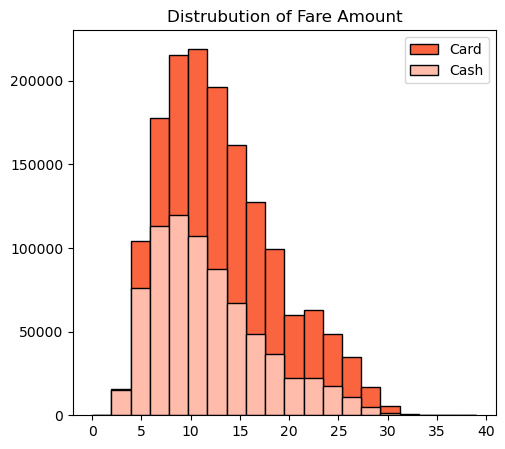

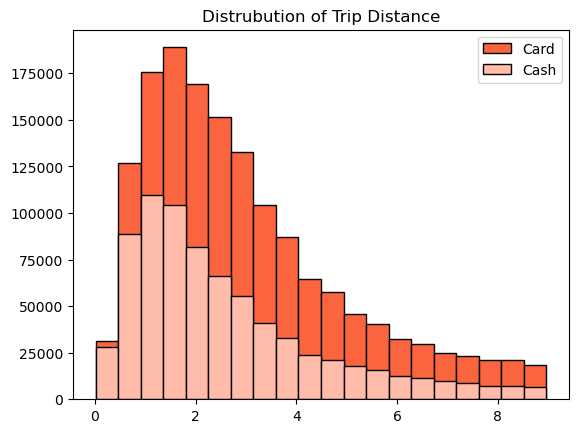

In [41]:
plt.figure(figsize=(12,5))
plt.subplot (1,2,1)
plt.title('Distrubution of Fare Amount')
plt.hist (df [df ['payment_type']=='Card'] ['fare_amount'], histtype= 'barstacked',bins = 20 ,edgecolor = 'k',color = '#FA643F', label = 'Card')
plt.hist (df [df ['payment_type']=='Cash'] ['fare_amount'], histtype= 'barstacked',bins = 20 ,edgecolor = 'k',color = '#FFBCAB', label = 'Cash')
plt.legend()
plt.show()


plt.title('Distrubution of Trip Distance')
plt.hist (df [df ['payment_type']=='Card'] ['trip_distance'], histtype= 'barstacked',bins = 20 ,edgecolor = 'k',color = '#FA643F', label = 'Card')
plt.hist (df [df ['payment_type']=='Cash'] ['trip_distance'], histtype= 'barstacked',bins = 20 ,edgecolor = 'k',color = '#FFBCAB', label = 'Cash')
plt.legend()
plt.show()

In [42]:

df.groupby('payment_type').agg({'fare_amount': ['mean', 'std'], 'trip_distance': ['mean', 'std']})

fare_amount           trip_distance         
                    mean       std          mean      std
payment_type                                             
Card           13.112493  5.849281      2.992237  1.99274
Cash           11.758005  5.613038      2.602207  1.91372

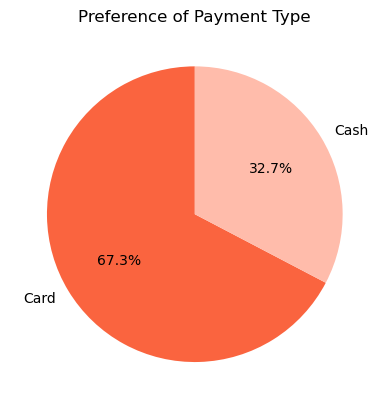

In [48]:
plt.title('Preference of Payment Type')
plt.pie(df['payment_type'].value_counts(normalize=True), 
        labels=df['payment_type'].value_counts().index, 
        startangle=90, 
#         shadow=True, 
        autopct='%1.1f%%', 
        colors=['#FA643F', '#FFBCAB'])
plt.show()

In [49]:
#passenger_count
df.groupby(['payment_type', 'passenger_count']) [['passenger_count']].count()

passenger_count
payment_type passenger_count                 
Card         1                         909245
             2                         327661
             3                         122412
             4                          63676
             5                         124045
Cash         1                         460550
             2                         155472
             3                          54506
             4                          32715
             5                          47626

In [51]:
# Grouping the data and counting passenger counts by payment type
passenger_count = df.groupby(['payment_type', 'passenger_count'])[['passenger_count']].count()

# Renaming column and resetting the index
passenger_count.rename(columns={'passenger_count': 'count'}, inplace=True)
passenger_count.reset_index(inplace=True)

# Calculating percentage
passenger_count['perc'] = (passenger_count['count'] / passenger_count['count'].sum()) * 100
passenger_count

,payment_type,passenger_count,count,perc
0,Card,1,909245,39.568381
1,Card,2,327661,14.259100
2,Card,3,122412,5.327106
3,Card,4,63676,2.771042
4,Card,5,124045,5.398171
5,Cash,1,460550,20.042143
6,Cash,2,155472,6.765806
7,Cash,3,54506,2.371984
8,Cash,4,32715,1.423686
9,Cash,5,47626,2.072581


In [53]:
# Creating the DataFrame with specified columns
df = pd.DataFrame(columns=['payment_type', 1, 2, 3, 4, 5])

# Setting values for 'payment_type' column
df['payment_type'] = ['Card', 'Cash']

# Filling in values for 'Card' and 'Cash' based on 'passenger_count'
df.iloc[0, 1:] = passenger_count.iloc[0:5, -1].values  # Values for 'Card' row
df.iloc[1, 1:] = passenger_count.iloc[5:, -1].values   # Values for 'Cash' row

df

,payment_type,1,2,3,4,5
0,Card,39.568381,14.2591,5.327106,2.771042,5.398171
1,Cash,20.042143,6.765806,2.371984,1.423686,2.072581


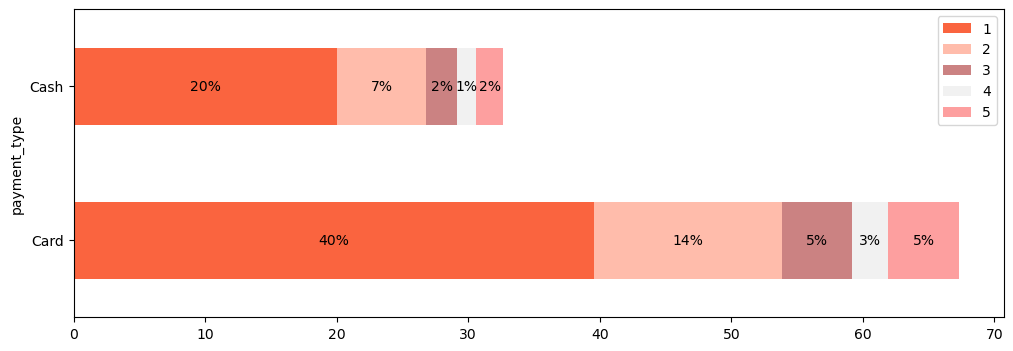

In [67]:
# Set a larger horizontal figure size
plt.figure(figsize=(12, 4))  # Adjust width and height as needed

# Create the bar plot and assign it to ax
ax = df.plot(x='payment_type', kind='barh', stacked=True, color=['#FA643F', '#FFBCAB', '#CB8282', '#F1F1F1', '#FD9F9F'], ax=plt.gca())

# Add percentage text to each bar
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2,
            y + height / 2,
            '{:.0f}%'.format(width),  
            horizontalalignment='center',
            verticalalignment='center')

plt.show()